Global Terrorism Dataset:
    
**************************
2nd Analysis - Terrorism across the world for the year 1970-2015
**************************

Terrorist attacks across the globe have increased in the coming years.
This analysis shows the  terrorist attacks across the regions in the world  on the map.
It gives a picture of regions with most number of terrorist attacks.


In [14]:
#importing libraries such as numpy , pandas and matplotlib
import os
import pandas as pd
from pandas import DataFrame
import datetime
import calendar
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import mpl_toolkits.basemap
from mpl_toolkits.basemap import Basemap

current_directory=os.getcwd()
root_directory=os.path.abspath(os.path.join(current_directory, os.pardir)) #To get the parent directory of current directory
path=root_directory+"/Data"
data_path = os.path.join(path, 'globalterrorismdb_0616dist.csv')

In [15]:
data = pd.read_csv(data_path,encoding = "ISO-8859-1")

In [13]:
#Regions are stored in regions and colors are assigned to it
regions = list(set(data.region_txt))

colors = ['yellow', 'red', 'lightblue', 'purple', 'green', 'orange', 'brown',\
          'aqua', 'lightpink', 'lightsage', 'lightgray', 'blue']

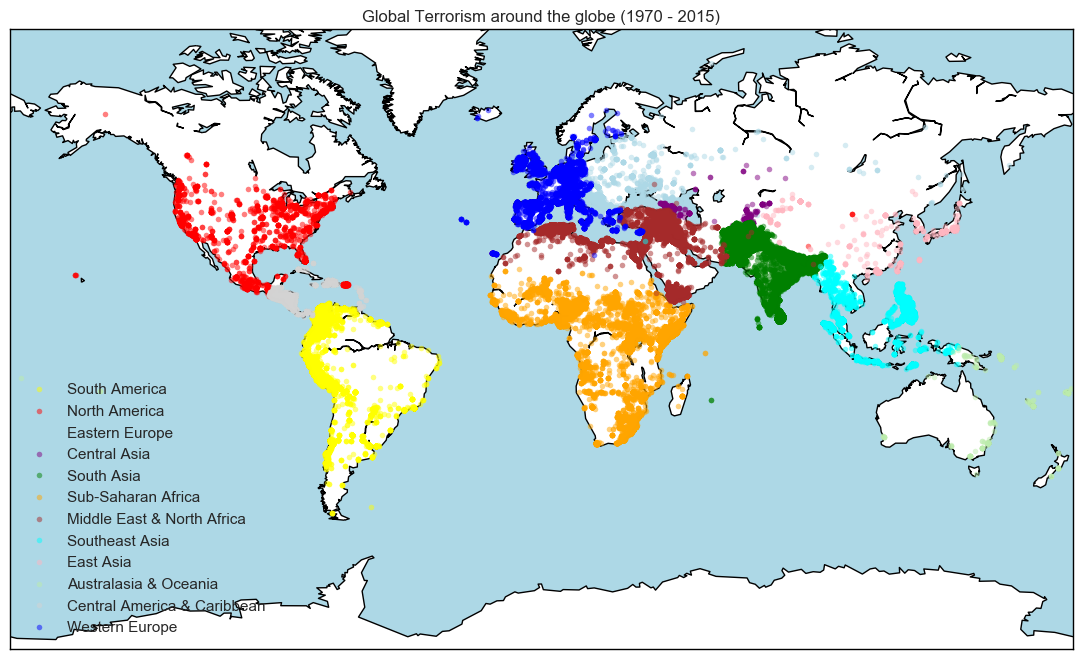

In [16]:
# world map with terrorist attacks during the year 1970-2015
plt.figure(figsize=(15,8))
earth = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
earth.drawcoastlines()
#earth.bluemarble()
earth.fillcontinents(color='white',lake_color='lightblue', zorder = 1)
earth.drawmapboundary(fill_color='lightblue')

def pltpoints(region, color = None, label = None):
    x, y = earth(list(data.longitude[data.region_txt == region].astype("float")),\
            (list(data.latitude[data.region_txt == region].astype("float"))))
    points = earth.plot(x, y, "o", markersize = 4, color = color, label = label, alpha = .5)
    return(points)

for i,region in enumerate(regions):
    pltpoints(region, color = colors[i], label = region)  
    
plt.title("Global Terrorism around the globe (1970 - 2015)")
plt.legend(loc ='lower left', prop= {'size':11})
plt.show() 
